# Side channel attack

This code demonstrates a timing side-channel attack on a Decision Tree classifier. The attacker measures the response times of predictions and analyzes differences between class outputs, which can reveal information leakage about the model's internal structure.

We import our packages, load the iris dataset, and split the data into training and testing.

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert to binary classification (Setosa vs Non-Setosa)
y = (y == 0).astype(int)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We train a Decision Tree classifier with a maximum depth of 5. (Decision trees have variable execution times based on how deep the tree needs to traverse to make a decision.)

In [6]:
# Train a Decision Tree model (which has varying computation times)
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Simulating an Attacker Measuring Response Times
timing_data = []
predictions = []

for x in X_test:
    start_time = time.perf_counter()  # Start timer
    pred = model.predict([x])  # Query the model
    end_time = time.perf_counter()  # End timer

    response_time = end_time - start_time
    timing_data.append(response_time)
    predictions.append(pred[0])

The attacker queries the black-box model with each test input, measures the response time for each query, and stores both the predicted class and the corresponding response time.

In [7]:
# Convert results to numpy arrays
timing_data = np.array(timing_data)
predictions = np.array(predictions)

# Analyze timing differences
class_0_times = timing_data[predictions == 0]
class_1_times = timing_data[predictions == 1]

# Print the average processing time per class
print(f"Avg Response Time for Class 0: {np.mean(class_0_times):.6f} sec")
print(f"Avg Response Time for Class 1: {np.mean(class_1_times):.6f} sec")

Avg Response Time for Class 0: 0.000251 sec
Avg Response Time for Class 1: 0.000244 sec


We calculate the average response time for each class.
If there is a significant difference between class response times, the attacker can infer that certain features cause deeper tree traversal (longer computation), and decision boundaries of the model can be estimated from timing alone.

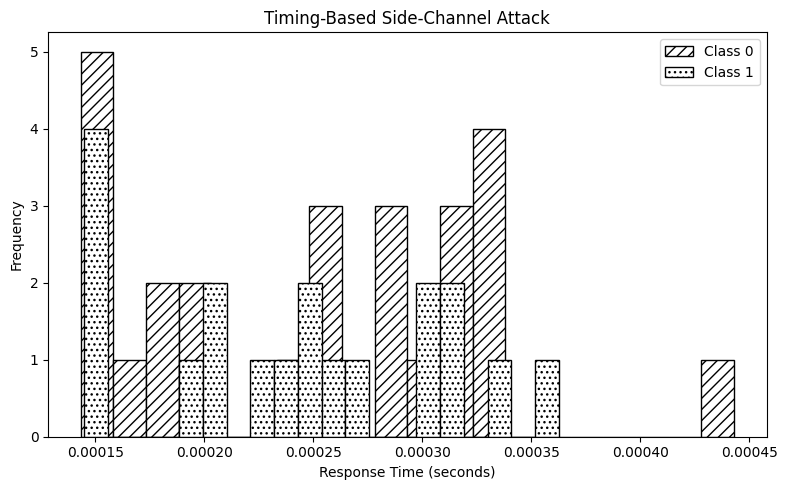

In [8]:
# Plot the results (Greyscale-compatible)
plt.figure(figsize=(8, 5))

# Class 0 with diagonal hatch
plt.hist(class_0_times, bins=20, alpha=1.0, label="Class 0",
         color='white', edgecolor='black', hatch='///')

# Class 1 with dotted hatch
plt.hist(class_1_times, bins=20, alpha=1.0, label="Class 1",
         color='white', edgecolor='black', hatch='...')

plt.xlabel("Response Time (seconds)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Timing-Based Side-Channel Attack")
plt.tight_layout()
plt.show()
